## Import Required Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## size of the data

In [5]:
data.shape

(8784, 8)

In [6]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [7]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


## Type of weather

In [10]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [11]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [12]:
data.Weather.nunique()

50

### converting the weather categories into standard categories

In [14]:
x='Thunderstorm,Moderate Rain showers, Fog'

In [15]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorm'], ['Moderate', 'Rain', 'showers'], ['Fog']]

In [16]:
from itertools import chain
flat_list =list(chain(*list_of_lists))
flat_list

['Thunderstorm', 'Moderate', 'Rain', 'showers', 'Fog']

In [17]:
def Create_list(x):
    list_of_lists =[w.split() for w in x.split(',')]
    flat_list=list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif'Fog' in list1:
        return 'FOG'
    elif'Clear' in list1:
        return 'Clear'
    elif'Cloudy' in list1:
        return 'Cloudy'
    else:
        return 'RAIN'

In [18]:
Create_list(x)

['Thunderstorm', 'Moderate', 'Rain', 'showers', 'Fog']

In [19]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [20]:
data['Std_Weather'] =data['Weather'].apply(lambda x : Get_Weather(Create_list(x)))

In [21]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [22]:
data.Std_Weather.value_counts()

Std_Weather
Cloudy       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

## Sample selection and data balancing

In [24]:
cloudy_df=data[data['Std_Weather'] == 'Cloudy'].sample(600) #just picking our 600 samples from this dataframe
cloudy_df.shape

(600, 9)

In [25]:
clear_df=data[data['Std_Weather'] == 'Clear'].sample(600)
clear_df.shape

(600, 9)

In [26]:
rain_df = data[data['Std_Weather'] == 'RAIN']
snow_df = data[data['Std_Weather'] == 'SNOW']

In [27]:
rain_df.shape


(603, 9)

In [28]:
snow_df.shape

(556, 9)

## Create New Weather Dataset:

In [30]:
weather_df = pd.concat([cloudy_df,clear_df,rain_df,snow_df], axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
2752,4/24/2012 16:00,8.1,-0.3,55,32,48.3,99.19,Cloudy,Cloudy
7220,10/27/2012 20:00,13.5,7.5,67,11,25.0,101.15,Cloudy,Cloudy
8074,12/2/2012 10:00,5.7,3.0,83,28,19.3,101.27,Cloudy,Cloudy
1386,2/27/2012 18:00,-6.3,-8.9,82,24,25.0,101.10,Cloudy,Cloudy
3737,6/4/2012 17:00,15.9,7.1,56,22,24.1,100.71,Mostly Cloudy,Cloudy


In [31]:
weather_df.shape

(2359, 9)

In [32]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
Cloudy    600
Clear     600
SNOW      556
Name: count, dtype: int64

## Drop columns data & Weather:

In [64]:
weather_df.drop(columns =['Date/Time', 'Weather'], axis=1, inplace=True)

In [71]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2752,8.1,-0.3,55,32,48.3,99.19,Cloudy
7220,13.5,7.5,67,11,25.0,101.15,Cloudy
8074,5.7,3.0,83,28,19.3,101.27,Cloudy
1386,-6.3,-8.9,82,24,25.0,101.10,Cloudy
3737,15.9,7.1,56,22,24.1,100.71,Cloudy


## duplicate records

In [73]:
weather_df[weather_df.duplicated()] ##checks and prints out any duplicate values

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [75]:
weather_df.isnull().sum() ## checks and prints out the number of null/missing values under each column


Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [77]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object

## Data Visualisation

In [80]:
weather_df.describe() ##statistics

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.722806,1.668037,72.332344,16.743959,23.269775,100.802666
std,11.353952,10.517333,15.688759,9.273284,12.794091,0.914539
min,-22.200000,-27.800000,22.000000,0.000000,0.600000,97.520000
25%,-2.900000,-6.800000,62.000000,9.000000,16.100000,100.300000
50%,5.500000,0.600000,75.000000,15.000000,24.100000,100.820000
75%,16.400000,10.500000,85.000000,22.000000,25.000000,101.380000
max,33.000000,23.100000,99.000000,57.000000,48.300000,103.590000


## correlation among features


In [85]:
cols=['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

In [87]:
cor_matrix=weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.945170,-0.243428,-0.149764,0.387127,-0.102342
Dew Point Temp_C,0.945170,1.000000,0.081010,-0.142236,0.180069,-0.211708
Rel Hum_%,-0.243428,0.081010,1.000000,0.036929,-0.668663,-0.337652
Wind Speed_km/h,-0.149764,-0.142236,0.036929,1.000000,-0.147013,-0.388127
Visibility_km,0.387127,0.180069,-0.668663,-0.147013,1.000000,0.335269
Press_kPa,-0.102342,-0.211708,-0.337652,-0.388127,0.335269,1.000000


##Heat Map

<Axes: >

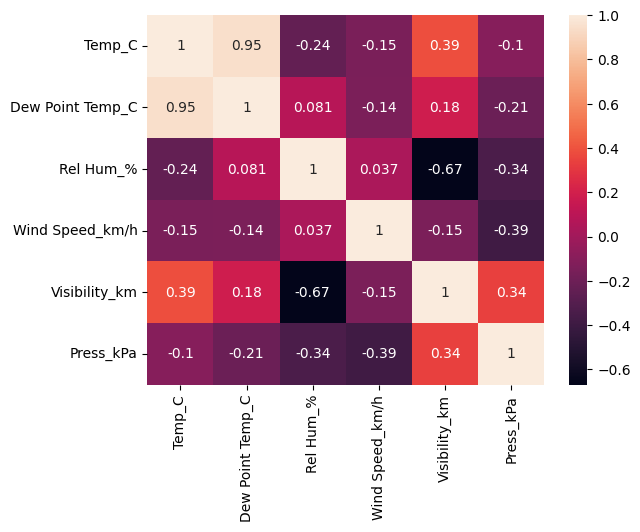

In [90]:
sns.heatmap(cor_matrix,annot=True)

In [92]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

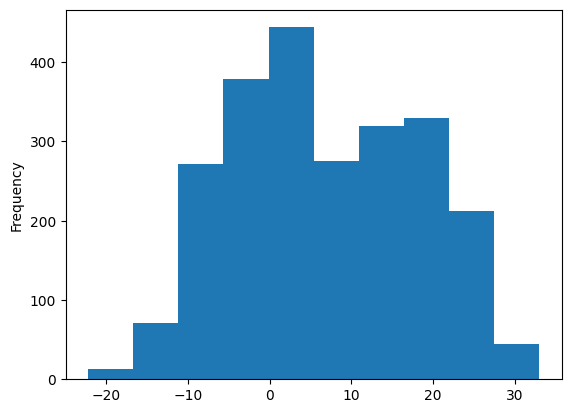

In [94]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

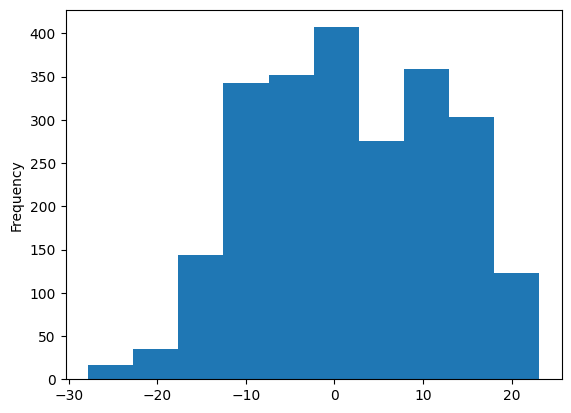

In [96]:
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

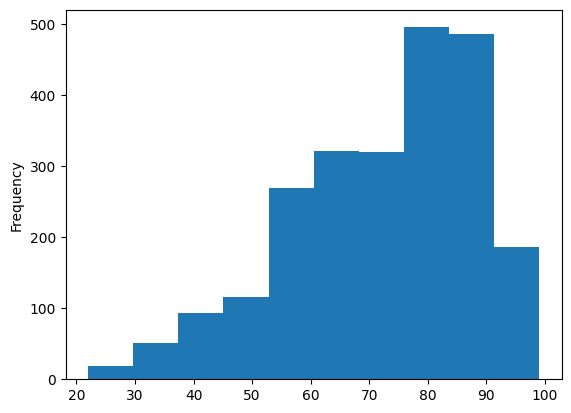

In [98]:
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

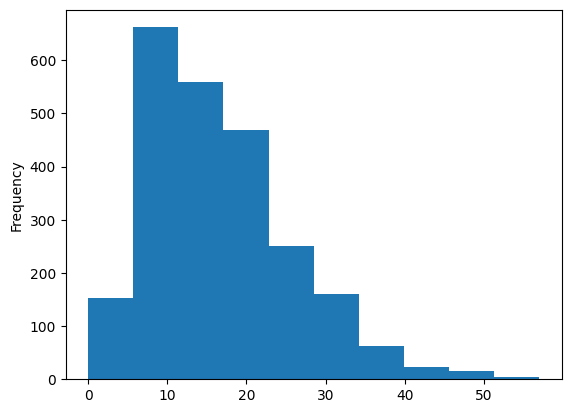

In [100]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

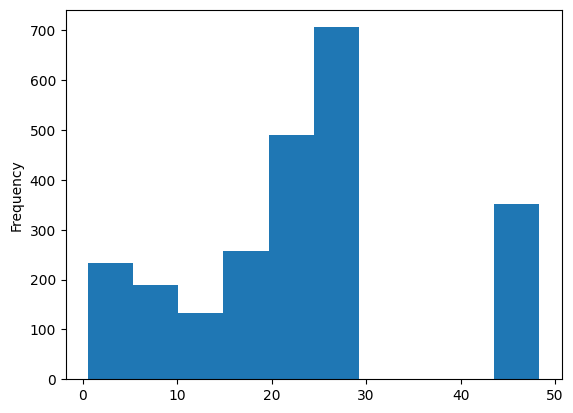

In [102]:
weather_df['Visibility_km'].plot(kind='hist')

<Axes: >

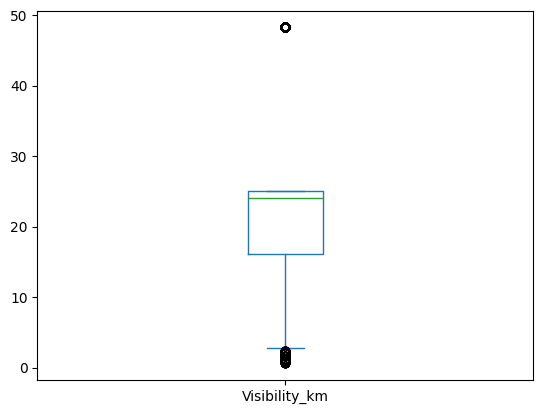

In [104]:
weather_df['Visibility_km'].plot(kind='box')

<Axes: >

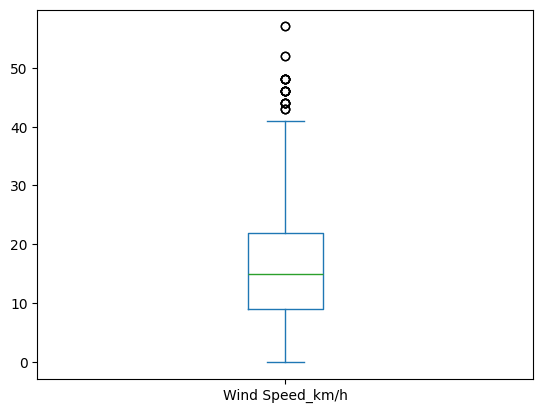

In [106]:
weather_df['Wind Speed_km/h'].plot(kind='box')

In [108]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2752,8.1,-0.3,55,32,48.3,99.19,Cloudy
7220,13.5,7.5,67,11,25.0,101.15,Cloudy
8074,5.7,3.0,83,28,19.3,101.27,Cloudy
1386,-6.3,-8.9,82,24,25.0,101.10,Cloudy
3737,15.9,7.1,56,22,24.1,100.71,Cloudy


## Label Encoding

In [112]:
from sklearn.preprocessing import LabelEncoder

In [114]:
label_Encoder =LabelEncoder()

In [116]:
weather_df['Std_Weather'] = label_Encoder.fit_transform(weather_df['Std_Weather'])

In [118]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [120]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2752,8.1,-0.3,55,32,48.3,99.19,1
7220,13.5,7.5,67,11,25.0,101.15,1
8074,5.7,3.0,83,28,19.3,101.27,1
1386,-6.3,-8.9,82,24,25.0,101.10,1
3737,15.9,7.1,56,22,24.1,100.71,1


In [122]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

X, Y variables

In [129]:
X = weather_df.drop(['Std_Weather'], axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
2752,8.1,-0.3,55,32,48.3,99.19
7220,13.5,7.5,67,11,25.0,101.15
8074,5.7,3.0,83,28,19.3,101.27
1386,-6.3,-8.9,82,24,25.0,101.10
3737,15.9,7.1,56,22,24.1,100.71
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [131]:
y=weather_df['Std_Weather']
y

2752    1
7220    1
8074    1
1386    1
3737    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int64

## Feature Scalling

In [138]:
from sklearn.preprocessing import StandardScaler

In [140]:
std_scaler =StandardScaler()

In [146]:
X_std = std_scaler.fit_transform(X)
X_std

array([[ 0.12132214, -0.1871629 , -1.10499618,  1.64550941,  1.95680423,
        -1.76373924],
       [ 0.59702831,  0.55462722, -0.33995517, -0.61954076,  0.1352649 ,
         0.37987146],
       [-0.09010283,  0.12667138,  0.68009951,  1.21407128, -0.31034772,
         0.51111293],
       ...,
       [-0.63628399, -0.30128446,  1.31763369,  1.21407128, -1.44392369,
        -0.93254326],
       [-0.60985587, -0.32981485,  1.06262002,  1.21407128, -1.06085319,
        -0.97629041],
       [-0.59223712, -0.35834523,  0.87135977,  1.42979034, -0.93576895,
        -0.99816399]])

## Splitting Data into training and testing

In [149]:
from sklearn.model_selection import train_test_split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [153]:
x_train.shape, x_test.shape

((1887, 6), (472, 6))

## More Building

In [178]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

## Model Training

In [181]:
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

## Model Prediction

In [192]:
y_pred_dt = decision_tree_model.predict(x_test)

## Model Evaluation

In [185]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Accuracy

In [194]:
accuracy_score(y_test, y_pred_dt)

0.597457627118644

## Classification Report

In [197]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       118
           1       0.46      0.38      0.42       128
           2       0.64      0.69      0.66       126
           3       0.75      0.76      0.75       100

    accuracy                           0.60       472
   macro avg       0.60      0.61      0.60       472
weighted avg       0.59      0.60      0.59       472



## Confusion Matrix

<Axes: >

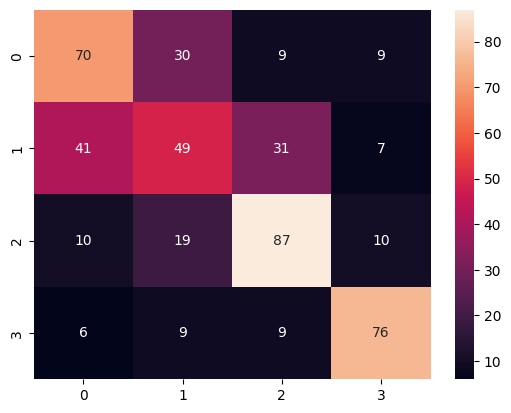

In [297]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, fmt='d')

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rf_model = RandomForestClassifier() 

In [208]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [232]:
dt_model =DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()

In [234]:
model_list = [dt_model,rf_model, svc_model, knn_model, lr_model, nb_model]

In [238]:
acc_list=[]
for model in model_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

In [240]:
acc_list

[0.5932203389830508,
 0.6588983050847458,
 0.614406779661017,
 0.6292372881355932,
 0.6038135593220338,
 0.5572033898305084]

In [244]:
model_df = pd.DataFrame({'Model' : model_list, 'Accuracy' : acc_list})
model_df

,Model,Accuracy
0,DecisionTreeClassifier(),0.593220
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.658898
2,SVC(),0.614407
3,KNeighborsClassifier(),0.629237
4,LogisticRegression(),0.603814
5,GaussianNB(),0.557203


## K-fold cross validation

In [247]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_std, y, cv=5, scoring='accuracy')
print('Cross-validation scores = ', scores)

Cross-validation scores =  [0.57415254 0.63347458 0.59745763 0.62076271 0.66666667]


In [249]:
scores.mean()

np.float64(0.618502824858757)

## Hyperparameter tunning : Model tuning

In [254]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [266]:
parameters={
    'n_estimators' : [50,100],
    'max_features' : ['sqrt', 'log2', None]
}

In [281]:
grid_search = GridSearchCV(estimator = rf_model,
                          param_grid = parameters)

In [283]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

## Best Hyper Parameters:

In [273]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [275]:
Random_forest_model_new = RandomForestClassifier(max_features='log2',n_estimators = 50)

In [277]:
Random_forest_model_new.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=50)

In [287]:
y_pred_rf=Random_forest_model_new.predict(x_test)

In [289]:
accuracy_score(y_test,y_pred_rf)

0.6652542372881356

In [279]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_new, X_std, y, cv=5, scoring='accuracy')
print('cross-validation scores = ', scores)

cross-validation scores =  [0.58262712 0.63135593 0.5720339  0.6059322  0.66242038]


In [293]:
scores.mean()

np.float64(0.6108739069415956)